In [1]:
import sys
print(sys.executable)


/opt/anaconda3/envs/pandexo310/bin/python


In [2]:
import pandexo.engine
from pandexo.engine.justdoit import run_pandexo
print("Pandexo code imports OK")



Pandexo code imports OK


In [3]:
import os
print(os.environ.get('pandeia_refdata'))


/Users/miaperovic/Downloads/Y3 Uni/Exoplanets Group Studies/PandExo/pandeia_data-2025.7-jwst


In [4]:
import pandexo.engine.justdoit as jdi

exo_dict = jdi.load_exo_dict()

# --- STAR SETUP ---
exo_dict['star']['type'] = 'phoenix'
exo_dict['star']['mag'] = 13.0
exo_dict['star']['ref_wave'] = 1.25
exo_dict['star']['temp'] = 5500
exo_dict['star']['metal'] = 0.0
exo_dict['star']['logg'] = 4.0
exo_dict['star']['w_unit'] = 'um'

# --- PLANET SETUP ---
exo_dict['planet']['type'] = 'constant'
exo_dict['planet']['radius'] = 0.01
exo_dict['planet']['f_unit'] = 'rp^2/r*^2'
# ⚠️ MISSING THIS OFTEN CAUSES THE NoneType ERROR:
exo_dict['planet']['transit_duration'] = 3600 # 1 hour in seconds
exo_dict['planet']['td_unit'] = 's'
exo_dict['planet']['w_unit'] = 'um'

# --- OBSERVATION SETUP ---
exo_dict['observation']['sat_level'] = 80
exo_dict['observation']['sat_unit'] = '%'
exo_dict['observation']['noccultations'] = 1
exo_dict['observation']['R'] = 0
# ⚠️ MISSING THESE OFTEN CAUSES THE NoneType ERROR:
exo_dict['observation']['baseline_unit'] = 'frac'
exo_dict['observation']['baseline'] = 1.0 # 1:1 ratio out-of-transit
exo_dict['observation']['noise_floor'] = 0 

# Run
result = jdi.run_pandexo(exo_dict, ['NIRSpec G140H'], save_file=False)


Running Single Case for: NIRSpec G140H


TypeError: None is not a valid Unit

In [ ]:
import sys, numpy as np
print(sys.executable)
print(np.__version__)

/opt/anaconda3/envs/pandexo310/bin/python
1.26.4


In [6]:
import traceback
import pandexo.engine.justdoit as jdi

try:
    jdi.run_pandexo(exo_dict, ['NIRSpec G140H'], save_file=False, verbose=True)
except Exception:
    traceback.print_exc()

Running Single Case for: NIRSpec G140H
Optimization Reqested: Computing Duty Cycle
Finished Duty Cycle Calc
Starting Out of Transit Simulation
End out of Transit
Starting In Transit Simulation
End In Transit


Traceback (most recent call last):
  File "/var/folders/b2/g40kmkgn0kj5zyp6h427bp2c0000gn/T/ipykernel_79804/1723093876.py", line 5, in <module>
    jdi.run_pandexo(exo_dict, ['NIRSpec G140H'], save_file=False, verbose=True)
  File "/opt/anaconda3/envs/pandexo310/lib/python3.10/site-packages/pandexo/engine/justdoit.py", line 402, in run_pandexo
    results =wrapper({"pandeia_input": inst_dict , "pandexo_input":exo}, verbose=verbose)
  File "/opt/anaconda3/envs/pandexo310/lib/python3.10/site-packages/pandexo/engine/pandexo.py", line 36, in wrapper
    return compute_full_sim(dictinput, verbose=verbose)
  File "/opt/anaconda3/envs/pandexo310/lib/python3.10/site-packages/pandexo/engine/jwst.py", line 264, in compute_full_sim
    var_tot = (to/ti/photon_out_bin)**2.0 * var_in_bin + (photon_in_bin*to/ti/photon_out_bin**2.0)**2.0 * var_out_bin
ZeroDivisionError: float division by zero


In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandexo.engine.justdoit as jdi # THIS IS THE HOLY GRAIL OF PANDEXO
import numpy as np
import os
exo_dict = jdi.load_exo_dict()
exo_dict['observation']['sat_level'] = 80    #saturation level in percent of full well 
exo_dict['observation']['sat_unit'] = '%' 
exo_dict['observation']['noccultations'] = 2 #number of transits 
exo_dict['observation']['R'] = None          #fixed binning. I usually suggest ZERO binning.. you can always bin later 
                                             #without having to redo the calcualtion
exo_dict['observation']['baseline'] = 1.0    #fraction of time in transit versus out = in/out
exo_dict['observation']['baseline_unit'] = 'frac' 
exo_dict['observation']['noise_floor'] = 0   #this can be a fixed level or it can be a filepath 
exo_dict['star']['type'] = 'phoenix'        #phoenix or user (if you have your own)
exo_dict['star']['mag'] = 8.0               #magnitude of the system
exo_dict['star']['ref_wave'] = 1.25         #For J mag = 1.25, H = 1.6, K =2.22.. etc (all in micron)
exo_dict['star']['temp'] = 5500             #in K 
exo_dict['star']['metal'] = 0.0             # as log Fe/H
exo_dict['star']['logg'] = 4.0
exo_dict['star']['radius'] = 1
exo_dict['star']['r_unit'] = 'R_sun'    
exo_dict['planet']['type'] = 'constant'
exo_dict['planet']['radius'] = 1                      #other options include "um","nm" ,"Angs", "secs" (for phase curves)
exo_dict['planet']['r_unit'] = 'R_jup'  
exo_dict['planet']['transit_duration'] = 2.0*60.0*60.0 
exo_dict['planet']['td_unit'] = 's'
exo_dict['planet']['f_unit'] = 'rp^2/r*^2'
print('Starting TEST run')

# jdi.run_pandexo(exo_dict, ['NIRSpec G140H'], save_file=False)
inst = jdi.load_mode_dict('NIRSpec G140H')
inst['configuration']['detector']['ngroup'] = 3   # or 5, 10, etc.

jdi.run_pandexo(exo_dict, inst, save_file=False, verbose=True)
print('SUCCESS') 

Starting TEST run
Running Single Case w/ User Instrument Dict
Starting Out of Transit Simulation
End out of Transit
Starting In Transit Simulation
End In Transit
SUCCESS


In [ ]:
import os

# Manually set the path without the extra internal quotes
os.environ['pandeia_refdata'] = "/Users/miaperovic/Downloads/Y3 Uni/Exoplanets Group Studies/PandExo/pandeia_data-2025.7-jwst"

# NOW import pandexo
import pandexo.engine.justdoit as jdi


In [ ]:
import numpy as np
print(f"Active NumPy Version: {np.__version__}")

Active NumPy Version: 1.26.4


In [ ]:
import numpy as np
import scipy.sparse as sp

# Test a standard little-endian float
try:
    data = np.array([1.0], dtype='<f4') # Little-endian
    sp.csr_matrix(data)
    print("✅ Little-endian check passed")
except Exception as e:
    print(f"❌ Little-endian failed: {e}")

# Test the 'Astronomy' big-endian float (The likely culprit)
try:
    data_be = np.array([1.0], dtype='>f4') # Big-endian
    sp.csr_matrix(data_be)
    print("✅ Big-endian check passed")
except Exception as e:
    print(f"❌ Big-endian check FAILED: {e}")

✅ Little-endian check passed
❌ Big-endian check FAILED: scipy.sparse does not support dtype float32. The only supported types are: bool_, int8, uint8, int16, uint16, int32, uint32, int64, uint64, longlong, ulonglong, float32, float64, longdouble, complex64, complex128, clongdouble.


In [8]:
exo_dict['planet']['type'] ='user'                       #tells pandexo you are uploading your own spectrum
exo_dict['planet']['exopath'] = os.path.join(os.getcwd(), 'trial_spectrum.txt')
exo_dict['planet']['w_unit'] = 'um'                      #other options include "um","nm" ,"Angs", "sec" (for phase curves)
exo_dict['planet']['f_unit'] = 'rp^2/r*^2'               #other options are 'fp/f*'
# exo_dict['planet']['transit_duration'] = 2.0*60.0*60.0   #transit duration
exo_dict['planet']['td_unit'] = 's'

In [9]:
result = jdi.run_pandexo(exo_dict,['NIRSpec G395M'], save_file=False)


Running Single Case for: NIRSpec G395M
Optimization Reqested: Computing Duty Cycle
Finished Duty Cycle Calc
Starting Out of Transit Simulation
End out of Transit
Starting In Transit Simulation
End In Transit


In [18]:
import pandexo.engine.justplotit as jpi
import pickle as pk

#load in output from run
# out = pk.load(open('trial_','r'))
#for a single run

x,y, e = jpi.jwst_1d_spec(result, R=100, num_tran=10, model=False, x_range=[2.7, 5], y_range=[0.008, 0.0092])


Loading BokehJS ...

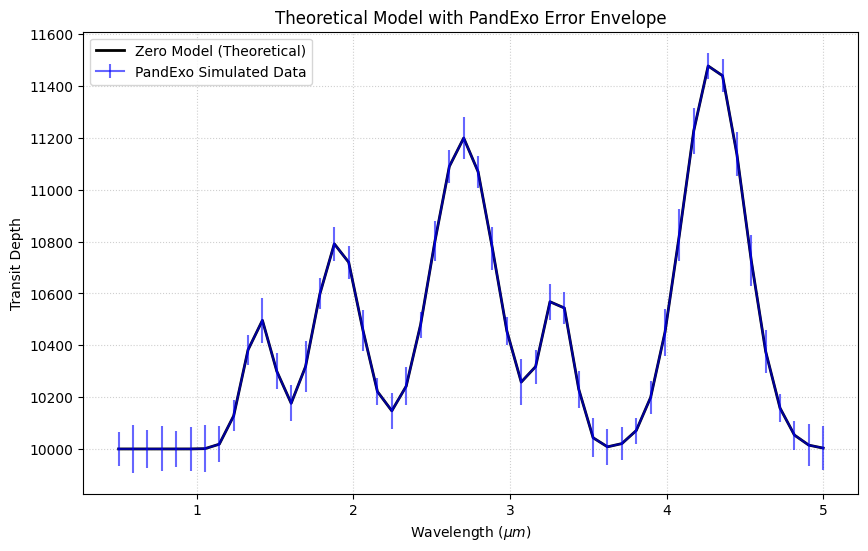

In [1]:
# trialing the gaussian code to generate the points from the error bars


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# to load the real data:
# data = pd.read_csv(' ')   - this is for the data file
# transit_depth = data[' '].values
# pandexo_error = data[' '].values


# generating fake data (will replace with the actual spectrums when the code works)

wavelengths = np.linspace(0.5, 5.0, 50)  # microns
base_depth = 10000 
zero_model = np.full_like(wavelengths, base_depth)

# Define some random peak locations, heights, and widths (to simulate molecules)
peaks = [
    {'loc': 1.4, 'height': 500, 'width': 0.1},  # Water peak 1
    {'loc': 1.9, 'height': 800, 'width': 0.15}, # Water peak 2
    {'loc': 2.7, 'height': 1200, 'width': 0.2}, # CO2 peak
    {'loc': 3.3, 'height': 600, 'width': 0.1},  # Methane peak
    {'loc': 4.3, 'height': 1500, 'width': 0.2}  # Strong CO2 peak
]

# Add the peaks to the baseline using the Gaussian formula
for p in peaks:
    zero_model += p['height'] * np.exp(-0.5 * ((wavelengths - p['loc']) / p['width'])**2)
    
pandexo_errors = np.random.uniform(50, 100, size=50) # Mock error bars

plt.figure(figsize=(10, 6))

# 1. Plot the 'Zero' Model (the "truth" line)
plt.plot(wavelengths, zero_model, color='black', lw=2, label='Zero Model (Theoretical)')

# 2. Plot the uncertainty region (The PandExo "Error Bars")
# Plotting error bars on the zero model
plt.errorbar(wavelengths, zero_model, yerr=pandexo_errors, color='blue', label='PandExo Simulated Data', alpha=0.6)


# 3. Formatting the graph
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Transit Depth')
plt.title('Theoretical Model with PandExo Error Envelope')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

In [28]:
# applying random normal function, loc is the mean, scale is the standard deviation
simulated_depths = np.random.normal(loc=zero_model, scale=pandexo_errors)

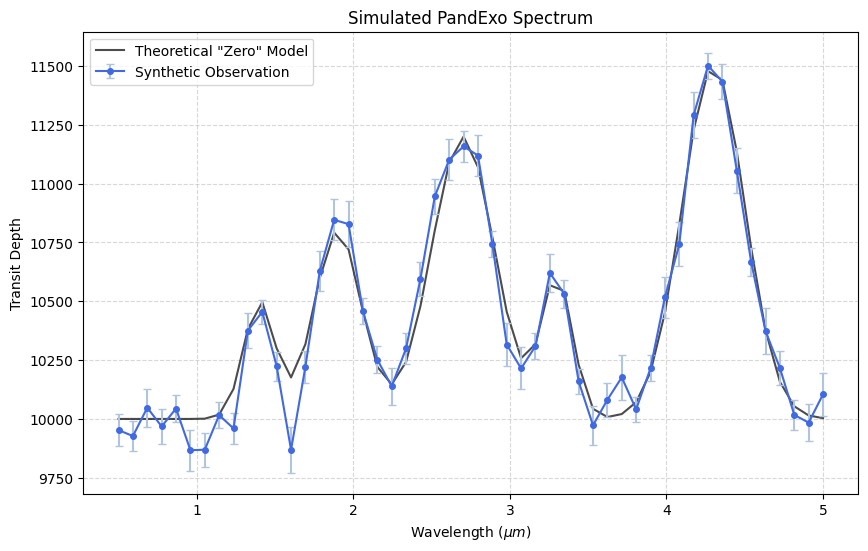

In [ ]:
# plotting everything together
plt.figure(figsize=(10, 6))

# Plot the "Zero" Graph (The truth)
plt.plot(wavelengths, zero_model, color='black', label='Theoretical "Zero" Model', alpha=0.7)

# Plot the Simulated Data Points with PandExo Error Bars
plt.errorbar(wavelengths, simulated_depths, yerr=pandexo_errors, 
             fmt='-o', color='royalblue', ecolor='lightsteelblue', 
             capsize=3, markersize=4, label='Synthetic Observation')

plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Transit Depth (ppm)')
plt.title('Simulated PandExo Spectrum')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

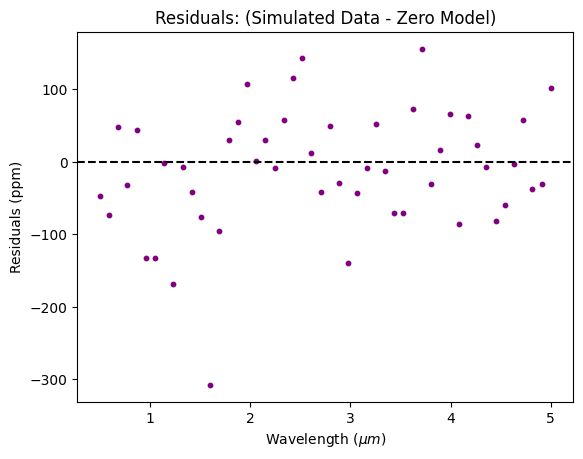

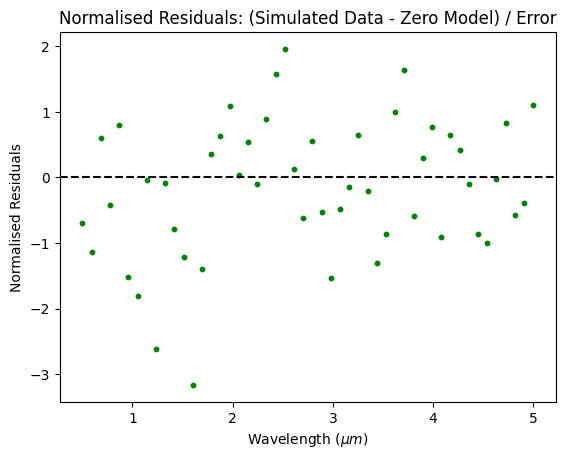

Fraction of points within 1-sigma: 0.72


In [45]:
# checking to see if the code has done what i think it has - multiple checks
# plotting residuals 
residuals = simulated_depths - zero_model
plt.scatter(wavelengths, residuals, color='purple', s=10)
plt.axhline(0, color='black', linestyle='--')
# plt.fill_between(wavelengths, -pandexo_errors, pandexo_errors, color='gray', alpha=0.2, label='1-sigma range')
plt.ylabel('Residuals (ppm)')
plt.xlabel('Wavelength ($\mu m$)')
plt.title('Residuals: (Simulated Data - Zero Model)')
plt.show()


# divide by size of error bar to get better residuals plot
normalised_residuals = residuals / pandexo_errors
plt.scatter(wavelengths, normalised_residuals, color='green', s=10)
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Normalised Residuals')
plt.xlabel('Wavelength ($\mu m$)')
plt.title('Normalised Residuals: (Simulated Data - Zero Model) / Error')
plt.show()

# calculating the fraction of points within 1 sigma of the zero model

# define boundaries
lower = -1
upper = 1

# create and use boolean mask to filter out points in range
filter = (normalised_residuals >= lower) & (normalised_residuals <= upper)

# calcualting the fraction of points within the range
fraction = np.sum(filter) / len(normalised_residuals)

print(f"Fraction of points within 1-sigma: {fraction:.2f}")


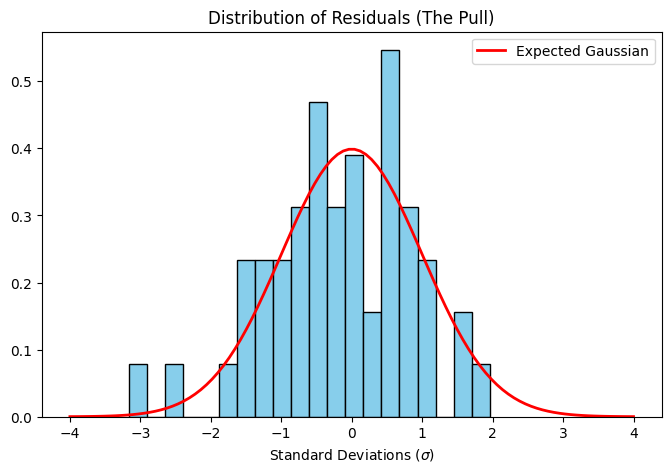

Percentage of points within 1-sigma: 72.0%


In [37]:
# another check, checking the 68-95-99.7 rule for Gaussian coverage

pull = (simulated_depths - zero_model) / pandexo_errors

plt.figure(figsize=(8, 5))
plt.hist(pull, bins=20, density=True, color='skyblue', edgecolor='black')

# Overlay a standard normal distribution (Mean=0, Std=1) for comparison
from scipy.stats import norm
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label='Expected Gaussian')

plt.xlabel('Standard Deviations ($\sigma$)')
plt.title('Distribution of Residuals (The Pull)')
plt.legend()
plt.show()

within_1sigma = np.sum(np.abs(pull) < 1) / len(pull)
print(f"Percentage of points within 1-sigma: {within_1sigma * 100:.1f}%")

In [38]:
print("Model Sample:", zero_model[:5])
print("Error Sample:", pandexo_errors[:5])

Model Sample: [10000.         10000.         10000.         10000.0000017
 10000.00034525]
Error Sample: [68.22672624 64.41874673 80.45140187 75.74481649 55.68570587]
